# ANALYZING THE SELLING PRICE OF USED CARS 
- Problem Statement: Our friend Otis wants to sell his car but isn't sure about the price. He wants to maximize profit while ensuring a reasonable deal for buyers. To help Otis we will analyze the dataset and determine the factors affecting car prices.



## 1. IMPORT THE LIBRARIES 

In [1]:
#  import the required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## 2. LOAD THE DATA 

In [2]:
data = pd.read_csv(r"C:\Users\Administrator\Downloads\car_dataset.csv")
data.head(5)

,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota Fielder 2011,Toyota,Fielder,2016,Automatic,Estate,CNG,1500,45852,1200000
1,Toyota Noah 2005,Toyota,Noah,2010,Automatic,Hatchback,CNG,1998,219630,1200000
2,Toyota LiteAce 2001,Toyota,LiteAce,2001,Manual,NaN,CNG,1800,102000,165000
3,Maruti Suzuki Vitara Brezza 1994,Maruti Suzuki,Vitara Brezza,1994,Manual,NaN,CNG,1600,113000,230000
4,Toyota Starlet good 1992,Toyota,Starlet,1992,Automatic,Saloon,CNG,1300,15000,330000


# COLUMN DEFINITIONS 
- car_name : Name of the car 
- brand: Brand of the car 
- car_model : The model of the car.
- model_year: The year of the particular model 
- transimission : Mode of transmission for the car 
- Body_type: The bodytype of the car 
- fuel_type : The fuel type of the car 
- engine_capacity: The capacity of an engine 
- kilometers_run : The mileage of the car or the distance the car has run in its lifetime 
-  Price: The price of the car 

## 3. EXPLORATORY DATA ANALYSIS

In [3]:
# find the columns datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car_name         1209 non-null   object
 1   brand            1209 non-null   object
 2   car_model        1209 non-null   object
 3   model_year       1209 non-null   int64 
 4   transmission     1209 non-null   object
 5   body_type        1191 non-null   object
 6   fuel_type        1209 non-null   object
 7   engine_capacity  1209 non-null   int64 
 8   kilometers_run   1209 non-null   int64 
 9   price            1209 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 94.6+ KB


In [4]:
# find the shape of the data 
data.shape

(1209, 10)

- The findings show that the dataset has 1209 rows and 10 columns

In [5]:
# The columns of the data 
data.columns

Index(['car_name', 'brand', 'car_model', 'model_year', 'transmission',
       'body_type', 'fuel_type', 'engine_capacity', 'kilometers_run', 'price'],
      dtype='object')

In [6]:
# find the missing values 
data.isnull().sum()

car_name            0
brand               0
car_model           0
model_year          0
transmission        0
body_type          18
fuel_type           0
engine_capacity     0
kilometers_run      0
price               0
dtype: int64


- The  column body_type has 18 missing values 

In [7]:
# handle the miising values 
data['body_type'] = data['body_type'].fillna('Unknown')

In [8]:
# check for missing values 
data.isnull().sum()

car_name           0
brand              0
car_model          0
model_year         0
transmission       0
body_type          0
fuel_type          0
engine_capacity    0
kilometers_run     0
price              0
dtype: int64

## 4. UNIVARIATE ANALYSIS 

In [9]:
# the value counts of the data model
data['car_model'].value_counts()


car_model
Premio       144
Axio         118
Allion       105
Noah          94
Corolla       91
            ... 
Spark          1
Ractis         1
HR-V           1
Voltz          1
CityRover      1
Name: count, Length: 123, dtype: int64

In [10]:
# the value counts of the body_type
data['body_type'].value_counts()

body_type
Saloon          623
SUV / 4x4       203
MPV             201
Hatchback        80
Estate           79
Unknown          18
Convertible       4
Coupé/Sports      1
Name: count, dtype: int64

In [11]:
#The value counts of the transmission
data['transmission'].value_counts()

transmission
Automatic    1146
Manual         63
Name: count, dtype: int64

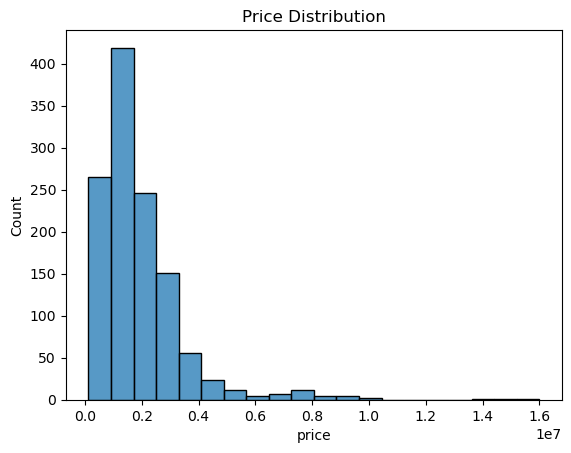

In [12]:
# The distibution of price 
plt.title('Price Distribution')
sns.histplot(data['price'], bins=20)
plt.show()


#### HISTOGRAM FINDINGS 
- The price has  high value outliers meaning there are some cars which are extremely expensive.
- Most cars have a price range of low to moderate.

## 5. MULTIVARIATE ANALYSIS 

In [13]:
#  statistical distribution
data.describe()

,model_year,engine_capacity,kilometers_run,price
count,1209.000000,1209.000000,1209.000000,1.209000e+03
mean,2009.558313,1681.456576,67294.827957,1.909523e+06
std,6.995986,385.357742,60052.792943,1.577613e+06
min,1983.000000,150.000000,6.000000,1.200000e+05
25%,2005.000000,1500.000000,39000.000000,9.700000e+05
50%,2011.000000,1500.000000,62000.000000,1.520000e+06
75%,2016.000000,1998.000000,78952.000000,2.380000e+06
max,2021.000000,4500.000000,900000.000000,1.600000e+07


In [15]:
#check out for  a correleation between price and other factors 
corr = data[['price', 'kilometers_run', 'model_year', 'engine_capacity']].corr()
corr

,price,kilometers_run,model_year,engine_capacity
price,1.000000,-0.291040,0.584084,0.431812
kilometers_run,-0.291040,1.000000,-0.415600,0.021967
model_year,0.584084,-0.415600,1.000000,-0.017948
engine_capacity,0.431812,0.021967,-0.017948,1.000000


### INTERPRETATION 
- As Kilometers_run or milage increases   the price tends to decrease otis may consider to buy a car with  low mileage.
- As model_year increaseses the price increases  This means most recent cars tend to be more expensive than older cars. 
- AS engine capacity increases the price also increases this means cars with large engine capacity are more expesive.
- Recent cars tend to have a small kilometers run .

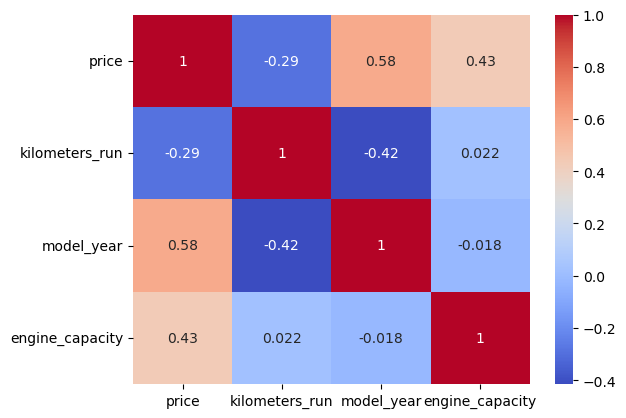

In [16]:
# CORRELATIONS VISUALIZATION 
corr = data[['price', 'kilometers_run', 'model_year', 'engine_capacity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## CATEGORICAL VS NUMERICAL

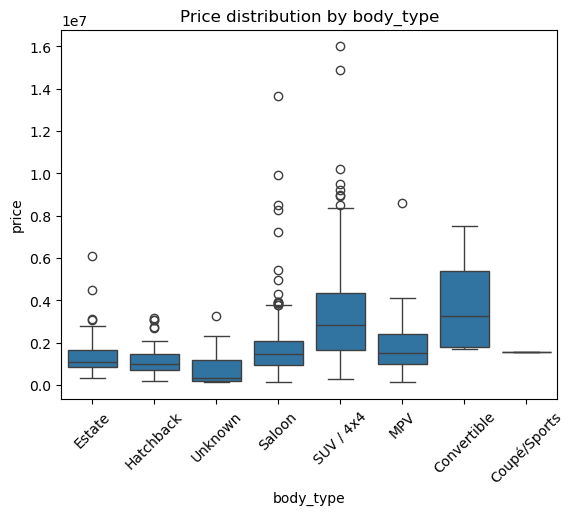

In [21]:
## a boxplot  between bodytype and price 
sns.boxplot(x=data['body_type'], y=data['price'], )
plt.xticks(rotation=45)  
plt.title('Price distribution by body_type')
plt.show()


- Estate has low prices however there are outliers. 
- hatchback are cheap.  
- saloon cars are relatively cheap however some saloon cars are very expensive. 
- suvs are range from low prices to very high prices. 
- mpv have are cheap with very few outliers but averall very affordable. 
- convertible cars have average  same prices with no car extremely expensive than others. 
- cope/sporst have similar prices however they are not many in this dataset.
- conclusion the body type tend to have effect on the price 

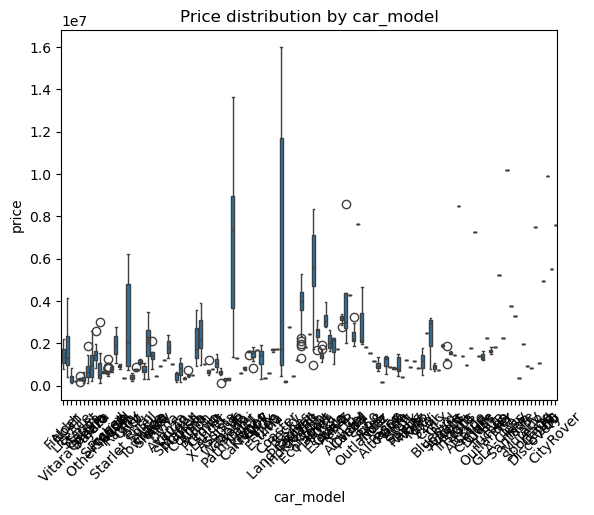

In [22]:
# boxplot between price and car_model 
sns.boxplot(x=data['car_model'], y=data['price'], )
plt.xticks(rotation=45)  
plt.title('Price distribution by car_model')
plt.show()

-A boxplot isnt the best idea for this 

In [23]:
data.groupby('car_model')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
car_model,,,,,,,,
320i,1.0,2.499999e+06,NaN,2499999.0,2499999.0,2499999.0,2499999.0,2499999.0
5 Series,1.0,2.750000e+06,NaN,2750000.0,2750000.0,2750000.0,2750000.0,2750000.0
APV,1.0,8.200000e+05,NaN,820000.0,820000.0,820000.0,820000.0,820000.0
Accent,5.0,1.330000e+06,318825.971339,1020000.0,1230000.0,1250000.0,1280000.0,1870000.0
Allion,105.0,1.928486e+06,757477.543368,950000.0,1290000.0,1720000.0,2730000.0,3575000.0
...,...,...,...,...,...,...,...,...
XJ,1.0,9.900000e+06,NaN,9900000.0,9900000.0,9900000.0,9900000.0,9900000.0
Yaris,2.0,1.380000e+06,0.000000,1380000.0,1380000.0,1380000.0,1380000.0,1380000.0
ist,5.0,7.710000e+05,72232.264259,700000.0,720000.0,765000.0,785000.0,885000.0


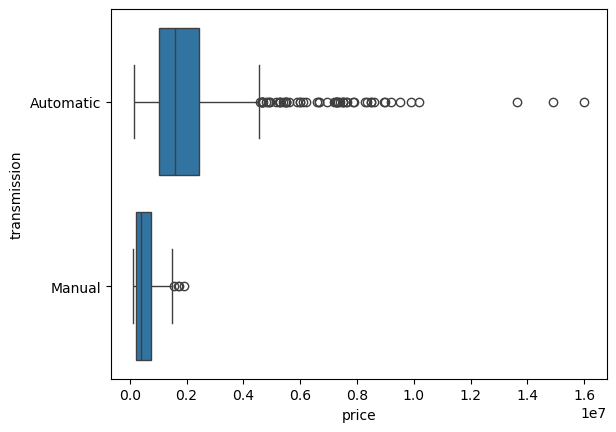

In [26]:
sns.boxplot( x=data['price'], y=data['transmission'])
plt.show()


- Automatic cars ar more expensive than manual cars 
- manual cars have low prices with 3 cars ad outliers 


In [29]:
# brand of the car 
data.groupby('brand')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Audi,1.0,5.500000e+06,NaN,5500000.0,5500000.00,5500000.0,5500000.00,5500000.0
BMW,2.0,2.625000e+06,1.767774e+05,2499999.0,2562499.25,2624999.5,2687499.75,2750000.0
Chery,1.0,2.300000e+05,NaN,230000.0,230000.00,230000.0,230000.00,230000.0
Chevrolet,1.0,4.000000e+05,NaN,400000.0,400000.00,400000.0,400000.00,400000.0
Daihatsu,2.0,2.050000e+05,4.242641e+04,175000.0,190000.00,205000.0,220000.00,235000.0
Ford,3.0,3.550000e+06,4.349379e+06,340000.0,1075000.00,1810000.0,5155000.00,8500000.0
Haval,1.0,2.250000e+06,NaN,2250000.0,2250000.00,2250000.0,2250000.00,2250000.0
Honda,65.0,2.193123e+06,1.040313e+06,490000.0,1750000.00,2050000.0,2570000.00,6200000.0
Hyundai,15.0,1.727333e+06,6.316471e+05,1020000.0,1390000.00,1650000.0,1850000.00,3780000.0


In [31]:
data.groupby('fuel_type')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
fuel_type,,,,,,,,
CNG,8.0,6.543750e+05,4.640616e+05,165000.0,222500.00,640000.0,1020000.00,1200000.0
"CNG, Hybrid",1.0,1.830000e+06,NaN,1830000.0,1830000.00,1830000.0,1830000.00,1830000.0
"CNG, Octane",405.0,1.066064e+06,5.161937e+05,125000.0,650000.00,1050000.0,1315000.00,2700000.0
Diesel,39.0,1.952424e+06,3.429192e+06,125000.0,375000.00,1150000.0,1750000.00,16000000.0
"Diesel, Petrol",1.0,2.300000e+06,NaN,2300000.0,2300000.00,2300000.0,2300000.00,2300000.0
Hybrid,56.0,2.895536e+06,1.625531e+06,1150000.0,1787500.00,2185000.0,3212500.00,7900000.0
"Hybrid, Octane",95.0,2.448600e+06,1.204680e+06,850000.0,1635000.00,2100000.0,2775000.00,8600000.0
"Hybrid, Octane, LPG",1.0,1.950000e+06,NaN,1950000.0,1950000.00,1950000.0,1950000.00,1950000.0
LPG,1.0,7.550000e+05,NaN,755000.0,755000.00,755000.0,755000.00,755000.0


# CONCLUSION 
- Factors affecting car prices 
- Transmission , kilometers_run , Engine capacity , model_year , car brand , car body type.